In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from time import time

%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [2]:
def apr(y_real, y_pred):
    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred)
    recall = recall_score(y_real, y_pred)
    f1 = f1_score(y_real, y_pred)
    
    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")
    return accuracy, precision, recall, f1

In [3]:
## accuracy, precision, recall, f1 score

def apr(y_pred, y_real):
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)
    
    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")
    return accuracy, precision, recall, f1


## confusion matrix

def produce_confusion(positive_label, negative_label, cut_off, df, y_pred_name, y_real_name):
    
    #Set pred to 0 or 1 depending on whether it's higher than the cut_off point.
    
    if cut_off != 'binary':      
        df['pred_binary'] = np.where(df[y_pred_name] > cut_off , 1, 0)
    else: 
        df['pred_binary'] = df[y_pred_name]
    
    #Build the CM
    cm = confusion_matrix(df[y_real_name], df['pred_binary'])  
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g'); 

    # labels, title, ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('Real labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels([negative_label, positive_label])
    ax.yaxis.set_ticklabels([negative_label, positive_label]);

    print('Test accuracy = ', accuracy_score(df[y_real_name], df['pred_binary']))
    print('Test precision = ', precision_score(df[y_real_name], df['pred_binary']))
    print('Test recall = ', recall_score(df[y_real_name], df['pred_binary']))
    print('Test F1 score = ', f1_score(df[y_real_name], df['pred_binary']))


    #return accuracy_score(df[y_real_name], df['pred_binary'])

In [4]:
df = pd.read_csv('oasis_longitudinal.csv')

In [38]:
df2 = df.copy()

In [39]:
df2.dropna(inplace = True)

In [40]:
df2 = df2.drop_duplicates(subset = "Subject ID",
                     keep = 'first')

In [42]:
df2['Group'].replace({"Converted":"Demented"}, inplace= True) #converting Converted to Demented


In [57]:
df2['Group'] = df2['Group'].replace([0,1], ['NonDemented','Demented'])

In [58]:
df2.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,NonDemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
5,OAS2_0004,OAS2_0004_MR1,NonDemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,NonDemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
13,OAS2_0008,OAS2_0008_MR1,NonDemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380
15,OAS2_0009,OAS2_0009_MR1,Demented,1,0,M,R,68,12,2.0,27.0,0.5,1457,0.806,1.205


(0.0, 0.16)

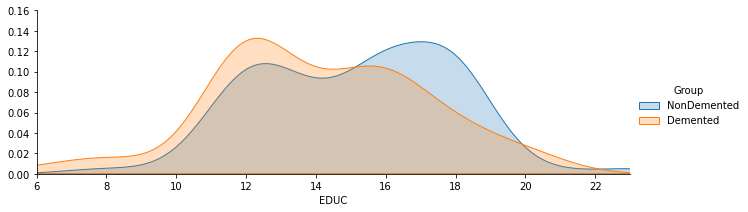

In [59]:
facet= sns.FacetGrid(df2,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

(0.0, 0.16)

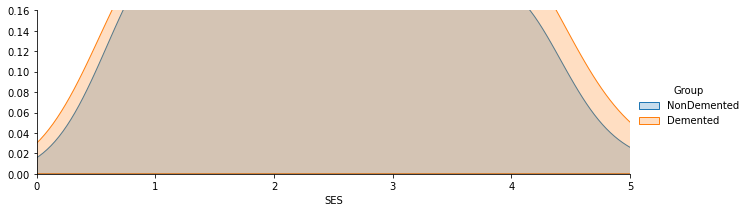

In [64]:
facet= sns.FacetGrid(df2,hue="Group", aspect=3)
facet.map(sns.kdeplot,'SES',shade= True)
facet.set(xlim=(0, df['SES'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

(0.6, 0.9)

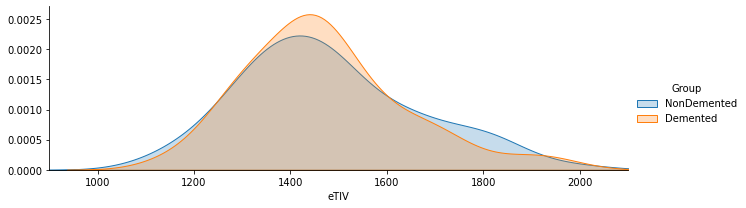

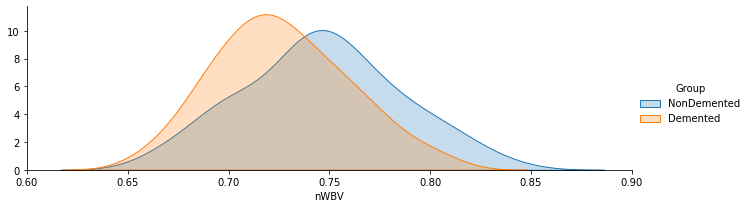

In [67]:
# #bar_chart('ASF') = Atlas Scaling Factor
# facet= sns.FacetGrid(df2,hue="Group", aspect=3)
# facet.map(sns.kdeplot,'ASF',shade= True)
# facet.set(xlim=(0, df['ASF'].max()))
# facet.add_legend()
# plt.xlim(0.5, 2)

#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(df2,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

#'nWBV' = Normalized Whole Brain Volume
# Nondemented = 0, Demented =1
facet = sns.FacetGrid(df2,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)



(50.0, 100.0)

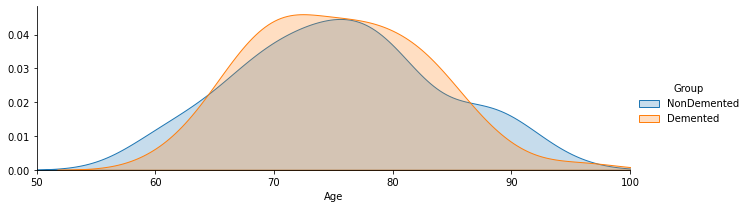

In [69]:
#AGE. Nondemented =0, Demented =0
facet= sns.FacetGrid(df2,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df2['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

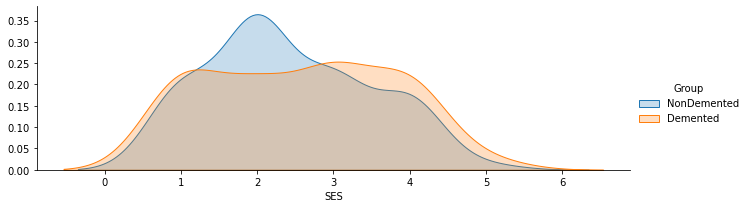

In [73]:
facet= sns.FacetGrid(df2,hue="Group", aspect=3)
facet.map(sns.kdeplot,'SES',shade= True)
# facet.set(xlim=(0, df2['SES'].max()))
facet.add_legend()
#plt.xlim(50,100)

In [ ]:
sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = airline)

In [5]:
data = df.copy()

In [6]:
# data.drop(columns = ['SES'], inplace = True)

In [7]:
data.dropna(inplace = True)

In [8]:
data.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [9]:
#Creating 2 dataframes

data1 = data.drop_duplicates(subset = "Subject ID",
                     keep = 'first')
print(data1.shape)
 
data2 = data.drop(data[data['Visit'] == 1].index)
data2.drop_duplicates(subset = "Subject ID",
                     keep = 'first',
                     inplace = True)
print(data2.shape)

(142, 15)
(142, 15)


In [10]:
data2.columns = ['Subject ID', 'MRI ID', 'Group', 'Visit 2',  'MR Delay 2', 'M/F', 'Hand', 'Age 2', 'EDUC 2','SES 2', 'MMSE 2', 'CDR 2',
                'eTIV 2', 'nWBV 2', 'ASF 2']

In [11]:
#merging 2 dataframes
data3 = pd.merge(data1,data2,on='Subject ID')

In [12]:
data3['MMSE minus'] = data3['MMSE 2'] - data3['MMSE']
data3['EDUC minus'] = data3['EDUC 2'] - data3['EDUC']
data3['SES minus'] = data3['SES 2'] - data3['SES']
data3['CDR minus'] = data3['CDR 2'] - data3['CDR']
data3['eTIV minus'] = data3['eTIV 2'] - data3['eTIV']
data3['ASF minus'] = data3['ASF 2'] - data3['ASF']
data3['Age minus'] = data3['Age 2'] - data3['Age']
data3['nWBV minus'] = data3['nWBV 2'] - data3['nWBV']
data3['MR Delay minus'] = data3['MR Delay 2'] - data3['MR Delay']
data3['Visit minus'] = data3['Visit 2'] - data3['Visit']

In [13]:
feature_columns =  [  'Group_x',  'M/F_x',
       'MMSE 2', 'EDUC',  'SES', 'CDR 2',  'Age 2',
       'eTIV minus', 'ASF minus', 'nWBV minus', 'MR Delay minus'
       ]


data4 = data3[feature_columns]

In [14]:
data5 = data4.copy()

In [33]:
save_data = data3.copy()
save_data['Group_x'].replace({"Converted":"Demented"}, inplace= True) #converting Converted to Demented


In [36]:
save_data.to_csv('MRI Alzheimer tableau 2.csv')

In [37]:
save_data.columns

Index(['Subject ID', 'MRI ID_x', 'Group_x', 'Visit', 'MR Delay', 'M/F_x',
       'Hand_x', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF',
       'MRI ID_y', 'Group_y', 'Visit 2', 'MR Delay 2', 'M/F_y', 'Hand_y',
       'Age 2', 'EDUC 2', 'SES 2', 'MMSE 2', 'CDR 2', 'eTIV 2', 'nWBV 2',
       'ASF 2', 'MMSE minus', 'EDUC minus', 'SES minus', 'CDR minus',
       'eTIV minus', 'ASF minus', 'Age minus', 'nWBV minus', 'MR Delay minus',
       'Visit minus'],
      dtype='object')

In [15]:

data5['Group_x'].replace({"Converted":"Demented"}, inplace= True) #converting Converted to Demented


#One hoc encoding!
data5['Group_x'] = data5['Group_x'].replace(['Nondemented','Demented'], [0,1]) #1 hoc encoding ND and D
data5 = pd.get_dummies(data5, prefix = 'Gender', columns=['M/F_x'], drop_first=True) # 1 hoc encdoing M/F

In [16]:
feature_cols2 =  ['MMSE 2', 
                  'EDUC', 
                  'SES', 
                  #'CDR 2',
                  'Age 2',
                  'eTIV minus',
                  'nWBV minus', 
                  #'MR Delay minus',
                  'Gender_M']

In [17]:
X = data5[feature_cols2]
y = data5['Group_x']

In [74]:
#Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 15, stratify=y)


In [75]:
X_train_eng = X_train.copy()
X_test_eng = X_test.copy()

Random Forest

In [76]:
#creating empty classifiers
rf = RandomForestClassifier(n_estimators=200, max_depth = 10)
et = ExtraTreesClassifier(n_estimators=200, max_depth = 10)

In [77]:
Cross validation?


#classfication scores
rf_score = cross_val_score(rf, X_train_eng, y_train, cv=5).mean()
et_score = cross_val_score(et, X_train_eng, y_train, cv=5).mean()

In [78]:



print(f'Random scored {rf_score}')
print(f'Extra Random scored {et_score}')

Random scored 0.6893280632411066
Extra Random scored 0.6549407114624506


In [79]:
#creating empty GridSearch 
rf_params = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [5, 6, 7, 8, 9, 10],
}
if rf_score > et_score:
    gs = GridSearchCV(rf, param_grid=rf_params, cv=5)  
else:
    gs = GridSearchCV(et, param_grid=rf_params, cv=5)

In [80]:
#fitting and identification of best classifier
gs.fit(X_train_eng, y_train)

print(gs.best_score_)

gs.best_params_

0.742292490118577


{'max_depth': 5, 'n_estimators': 50}

In [81]:
#classfier score
gs.score(X_train_eng, y_train)

0.9911504424778761

In [82]:
## Predict on Train
X_train_eng['pred'] = gs.predict(X_train_eng)
X_train_eng

## Check Accuracy, Precision, Recall & F1
apr(X_train_eng['pred'], y_train)

Accuracy:0.9911504424778761
Precision:1.0
Recall:0.9821428571428571
F1:0.9909909909909909


(0.9911504424778761, 1.0, 0.9821428571428571, 0.9909909909909909)

In [83]:
## Predict on Test
y_pred_test = gs.predict(X_test_eng)
X_test_eng['pred'] = y_pred_test
X_test_eng

## Check Accuracy, Precision, Recall & F1
apr(X_test_eng['pred'], y_test)

Accuracy:0.7586206896551724
Precision:0.8181818181818182
Recall:0.6428571428571429
F1:0.7200000000000001


(0.7586206896551724,
 0.8181818181818182,
 0.6428571428571429,
 0.7200000000000001)

In [84]:
apr(X_train_eng['pred'], y_train)

Accuracy:0.9911504424778761
Precision:1.0
Recall:0.9821428571428571
F1:0.9909909909909909


(0.9911504424778761, 1.0, 0.9821428571428571, 0.9909909909909909)

In [85]:
# preparing for the beautiful metrics function
metric = X_test_eng.copy()
metric = metric.join(y_test)
metric

,MMSE 2,EDUC,SES,Age 2,eTIV minus,nWBV minus,Gender_M,pred,Group_x
74,29.0,18,1.0,72,16,-0.012,1,0,0
137,26.0,20,1.0,81,8,-0.020,1,1,1
37,30.0,16,3.0,70,14,-0.003,0,0,0
38,17.0,12,4.0,72,22,-0.029,1,1,1
7,30.0,12,4.0,82,-18,0.005,0,0,0
62,16.0,12,4.0,71,45,-0.034,0,1,1
33,29.0,18,1.0,77,5,-0.006,0,0,0
109,27.0,16,3.0,78,2,-0.015,0,0,1
82,17.0,16,1.0,71,-6,-0.011,1,1,1
0,30.0,14,2.0,88,17,-0.015,1,1,0


In [86]:
#running the beautiful metrics function
# produce_confusion('Stayed','Churned','binary',metric,'pred','Churn Value')

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred_test)
print(conf_mat)

[[13  2]
 [ 5  9]]


In [ ]:
make confusion matrix normalised!!